<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Classifier/Classifier_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image

In [2]:
df=pd.read_csv('/content/mushroom_cleaned.csv')
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [4]:
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [5]:
df.duplicated().sum()

303

In [6]:
df.drop_duplicates(inplace=True)

There were no null/na rows, </br> There were duplicates which are removed

In [7]:
df.shape

(53732, 9)

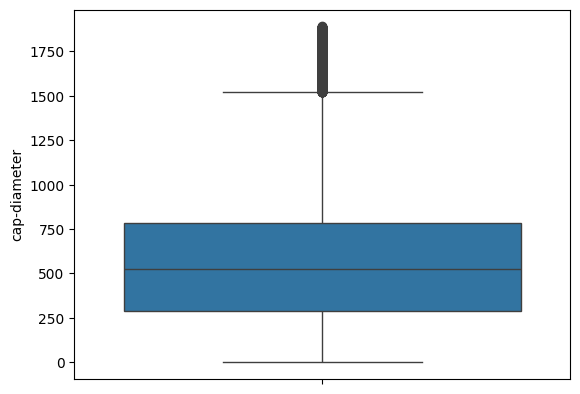

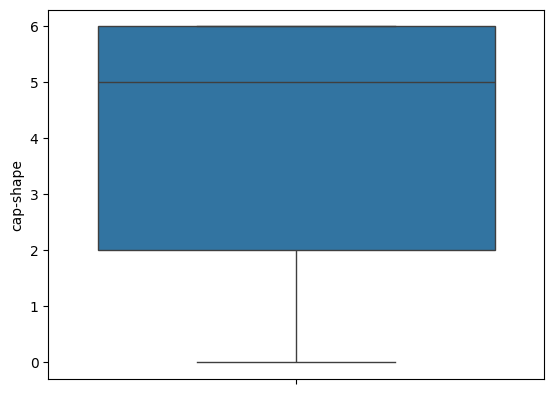

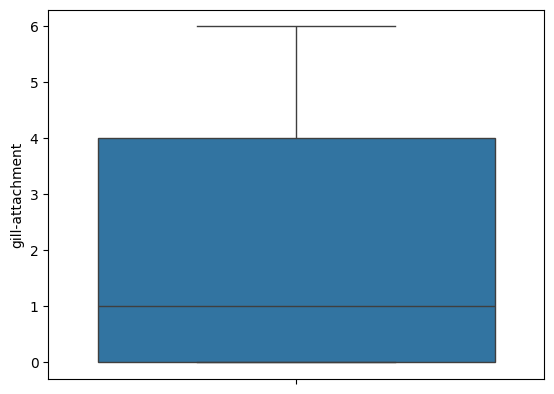

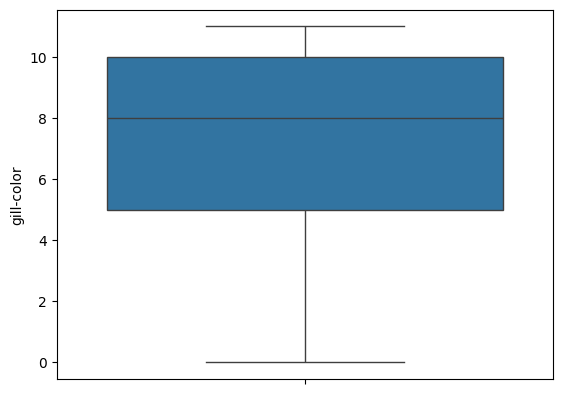

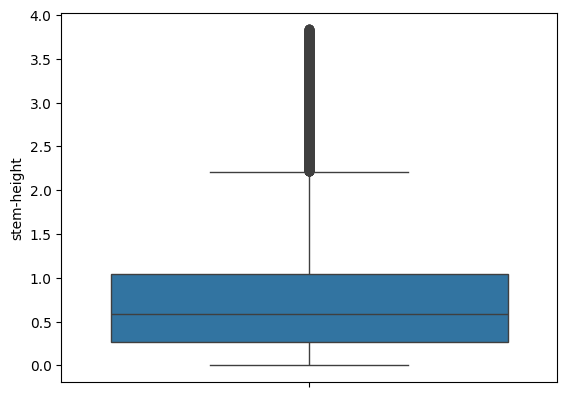

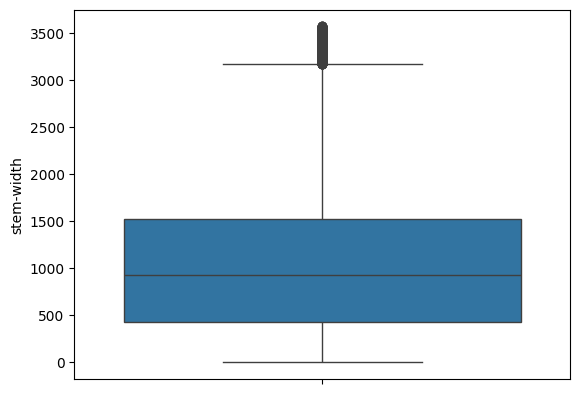

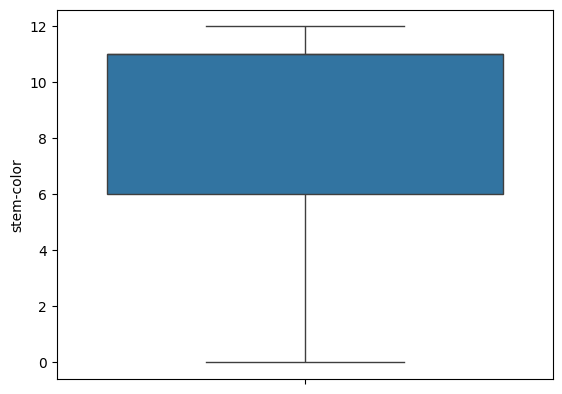

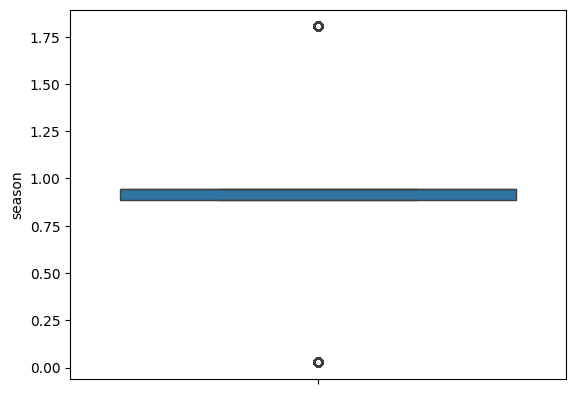

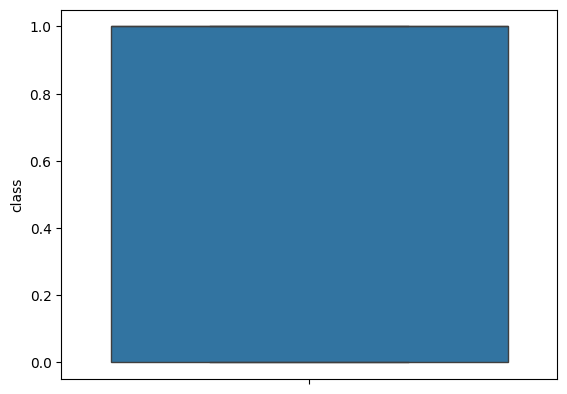

In [8]:
cols =df.select_dtypes(exclude='object').columns
for col in cols:
  sns.boxplot(df[col])
  pyplot.show()


In [9]:

def remove_outliers(data_frame, series_col):
 Q1 = np.percentile(series_col, 25)
 Q3 = np.percentile(series_col, 75)
 IQR = Q3 - Q1
 Lower_Limit = Q1 - 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 data_frame = data_frame[(series_col >Lower_Limit) & (series_col < Upper_Limit)]
 return data_frame

In [10]:
df=remove_outliers(df,df['cap-diameter'])
df=remove_outliers(df,df['stem-width'])
df=remove_outliers(df,df['stem-height'])

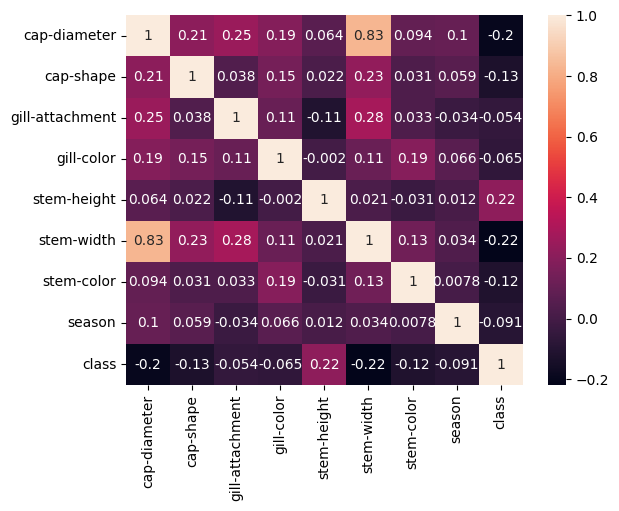

In [11]:
sns.heatmap(df.corr(),annot=True)
pyplot.show()

In [12]:
df['class'].value_counts()

,count
class,
1,27352
0,23089


<span style='bold'>Now, I just look at the heatmap , the correlation and decides on which feature variables ? It works. What mistake I am making by not looking at the relationship of variables ? </span>

In [102]:

y=df[['class']]

X=df[['stem-height','stem-width','cap-shape','stem-color']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [103]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [104]:
# dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
# pyplot.figure(figsize=(30,20))
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [105]:

y_test_pred=model.predict(X_test)

print('Accuracy of DST :', accuracy_score(y_test, y_test_pred))

Accuracy of DST : 0.8525126375260185


[[3876  714]
 [ 774 4725]]


Text(58.222222222222214, 0.5, 'Truth')

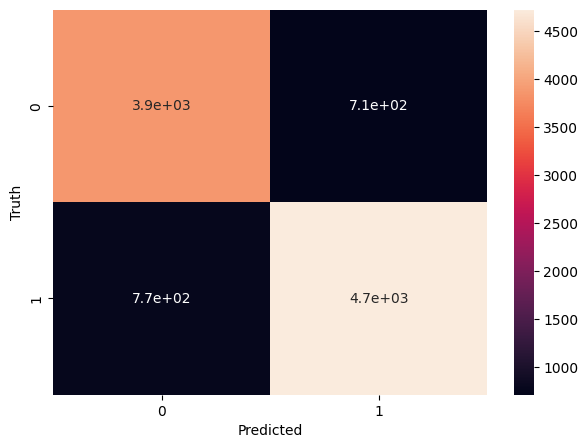

In [106]:

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:

rf_classifier =RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50)

In [108]:
rf_estimator=rf_classifier.estimators_[2]



In [109]:
y_test_pred=rf_classifier.predict(X_test)
print('Accuracy of Random Forest :', accuracy_score(y_test, y_test_pred))

Accuracy of Random Forest : 0.8748141540291406


[[4029  561]
 [ 702 4797]]


Text(58.222222222222214, 0.5, 'Truth')

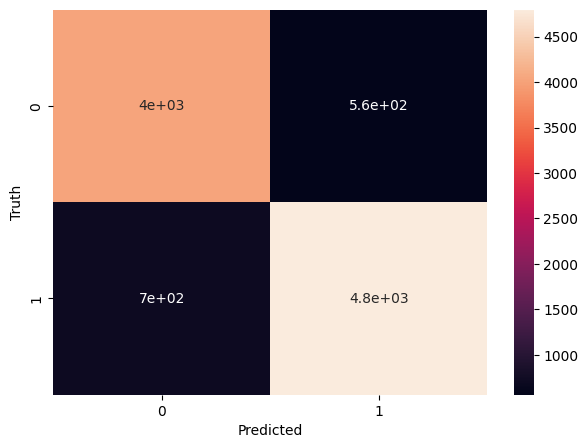

In [110]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With RandomForest, compared to DecisionTree, Accuracy has improved

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_test_pred=knn.predict(X_test)
print('Accuracy of KNN :', accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN : 0.7080979284369114


<Axes: xlabel='stem-height', ylabel='stem-width'>

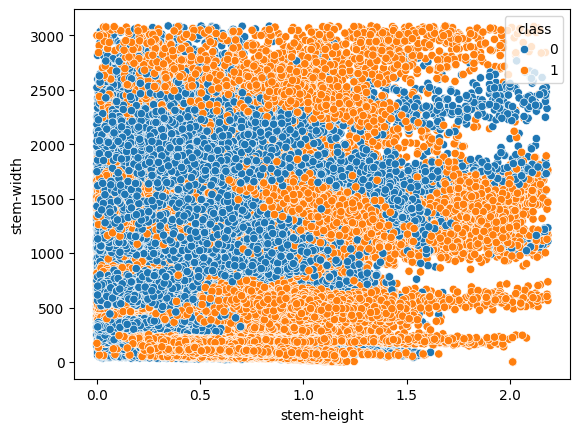

In [101]:
cols =['stem-height','stem-width','cap-diameter','cap-shape']

sns.scatterplot(df, x='stem-height',y='stem-width', hue='class')
